## KMeans Clustering

**The Data**

**LINK:** https://archive.ics.uci.edu/ml/datasets/bank+marketing

This dataset is public available for research. The details are described in [Moro et al., 2011].

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
 For more information, read [Moro et al., 2011].
 
 ***Goal*** : Menentukan kelompok pelanggan yang layak untuk segmentasi dan studi pemasaran

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\bank-additional-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## EDA dan DATA VISUAL

In [8]:
# missing values
df_null = round(100*df.isna().sum()/len(df),2)
df_null

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [9]:
# data dupicate
df_ganda = df.duplicated(subset=None).sum()
df_ganda

12

In [10]:
# hapus data duplicat
df = df.drop_duplicates()
df.shape

(41176, 21)

In [11]:
df.describe().T.index

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [12]:
plt.style.use(['science','notebook','grid'])

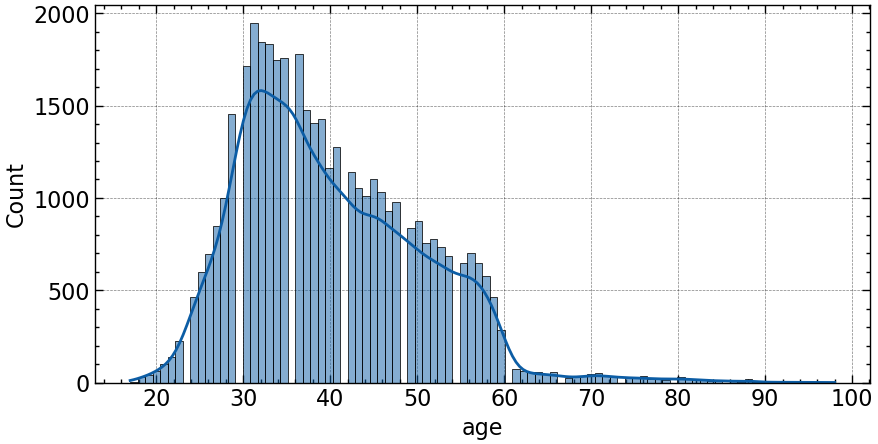

In [13]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(x='age', data=df, kde=True);

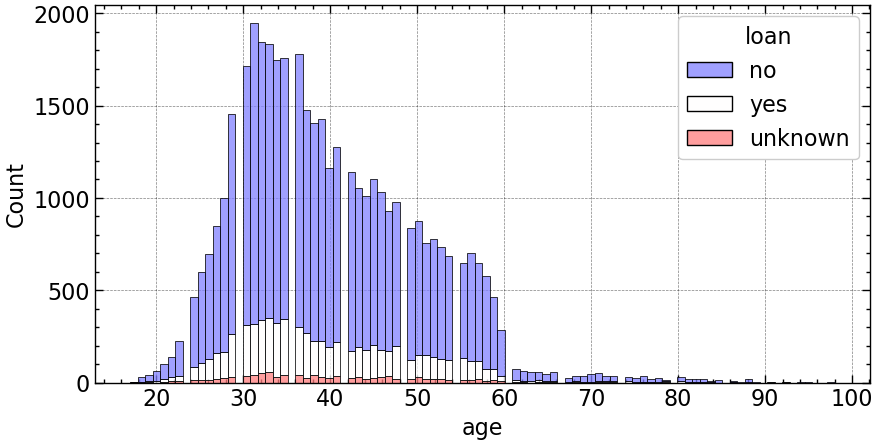

In [14]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(x='age', hue='loan', data=df, multiple='stack', palette='bwr');

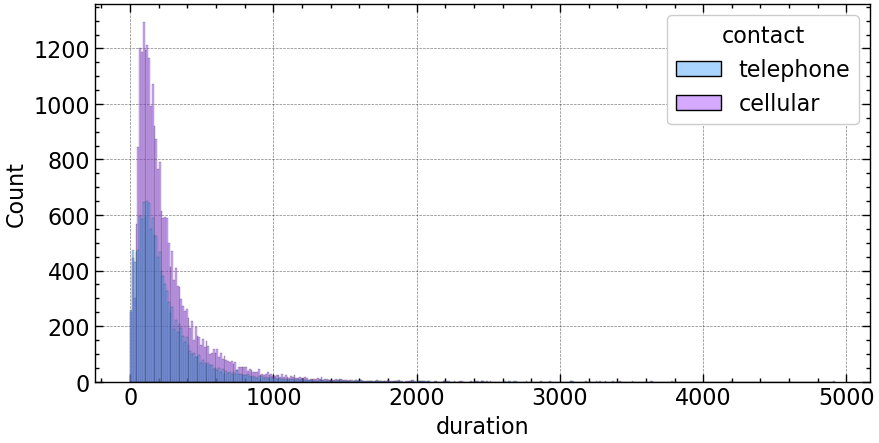

In [15]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(x='duration', hue='contact', data=df,palette='cool');

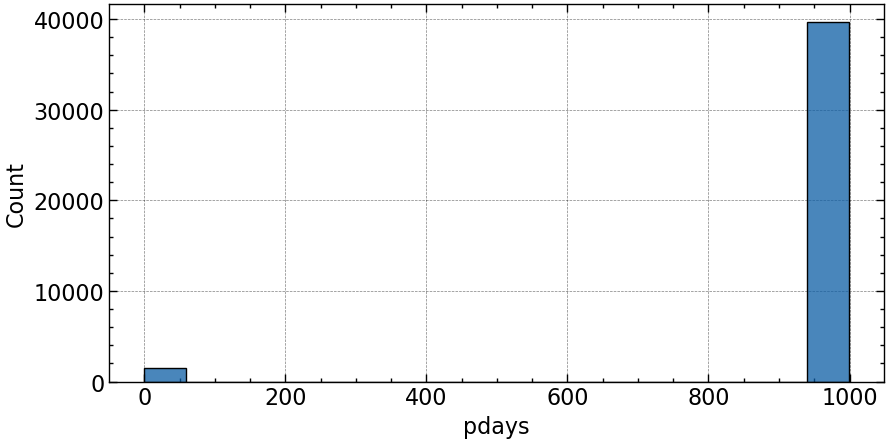

In [16]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(x='pdays', data=df);

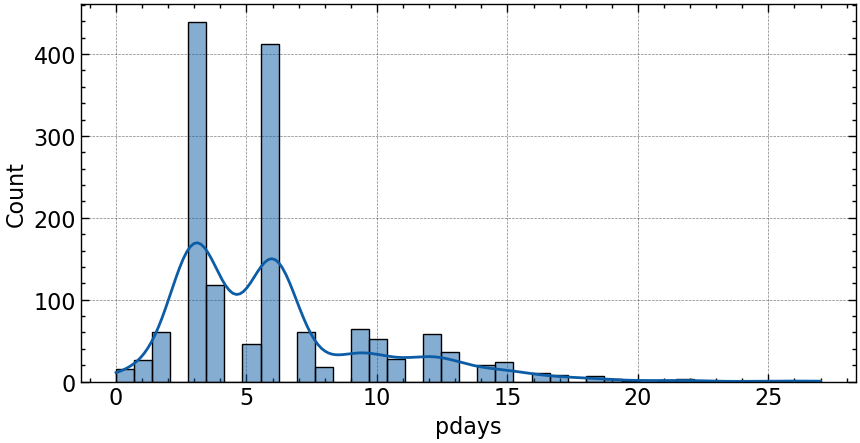

In [17]:
plt.figure(figsize=(10,5), dpi=100)
data = df[df['pdays']!=999]
sns.histplot(x='pdays', data = data, kde=True);

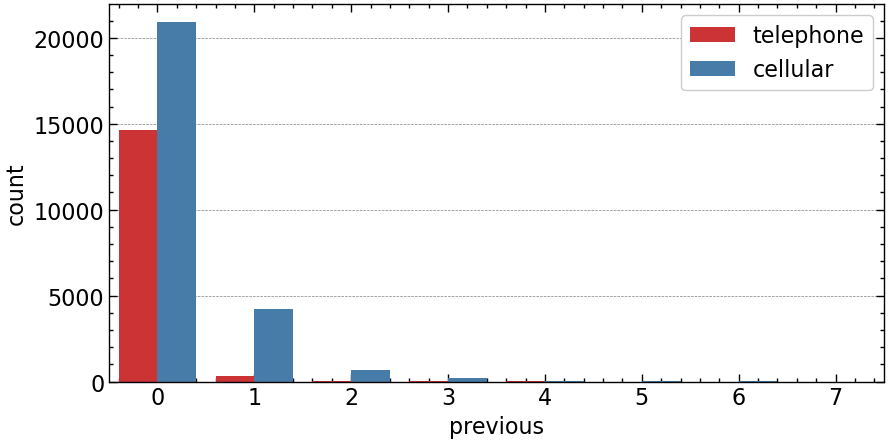

In [18]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='previous', hue='contact', data=df, palette='Set1');
plt.legend(loc=1)

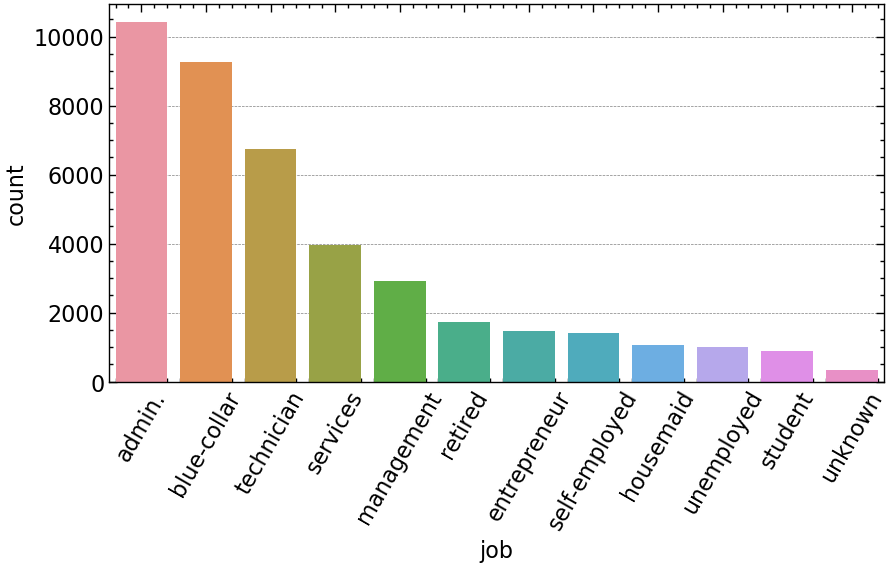

In [19]:
plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(x='job', order=df['job'].value_counts().index, data=df);
plt.xticks(rotation=60)
plt.show()

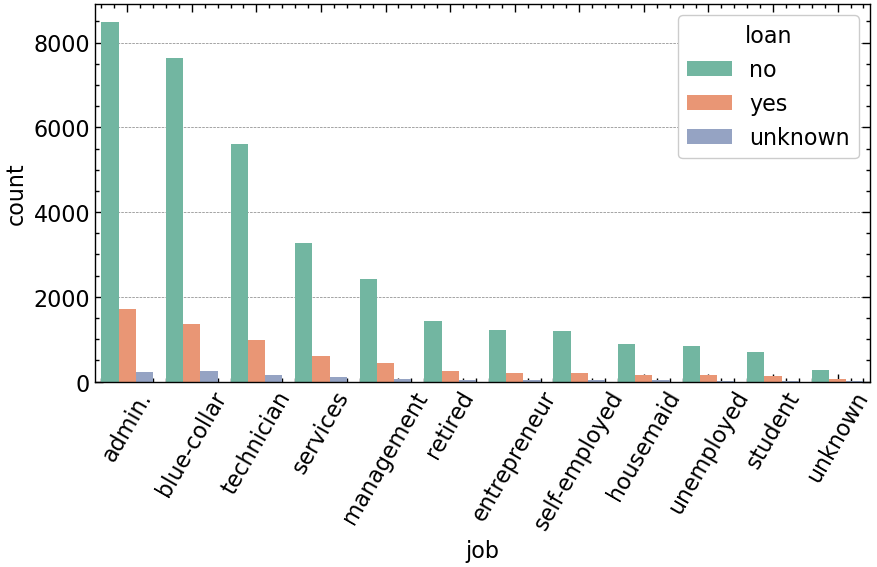

In [20]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='job', hue='loan', data=df, palette='Set2', order=df['job'].value_counts().index);
plt.xticks(rotation=60)
plt.show()

Text(0.5, 1.0, 'Marital status')

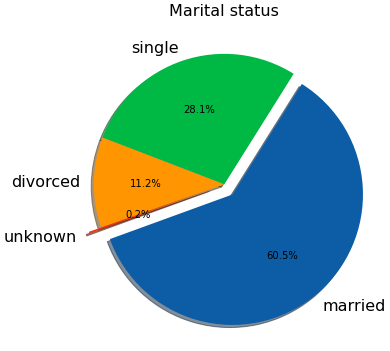

In [21]:
marital_stat = df['marital'].value_counts()
explode=(0.1,0.0, 0., 0.1)
plt.pie(marital_stat, labels=marital_stat.index, autopct='%1.1f%%', startangle=200, shadow=True, explode=explode);
plt.title('Marital status')

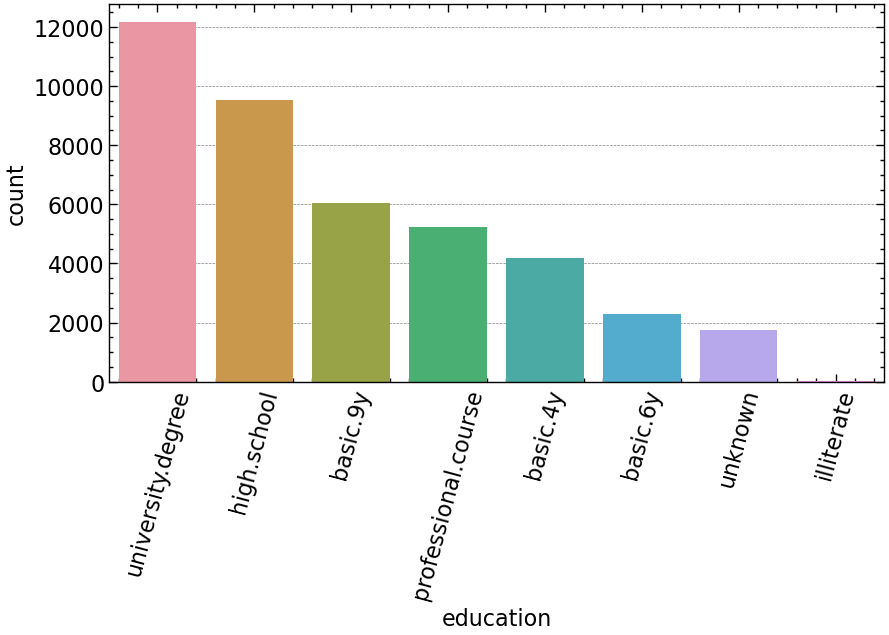

In [22]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='education', data=df, order=df['education'].value_counts().index);
plt.xticks(rotation=75)
plt.show()

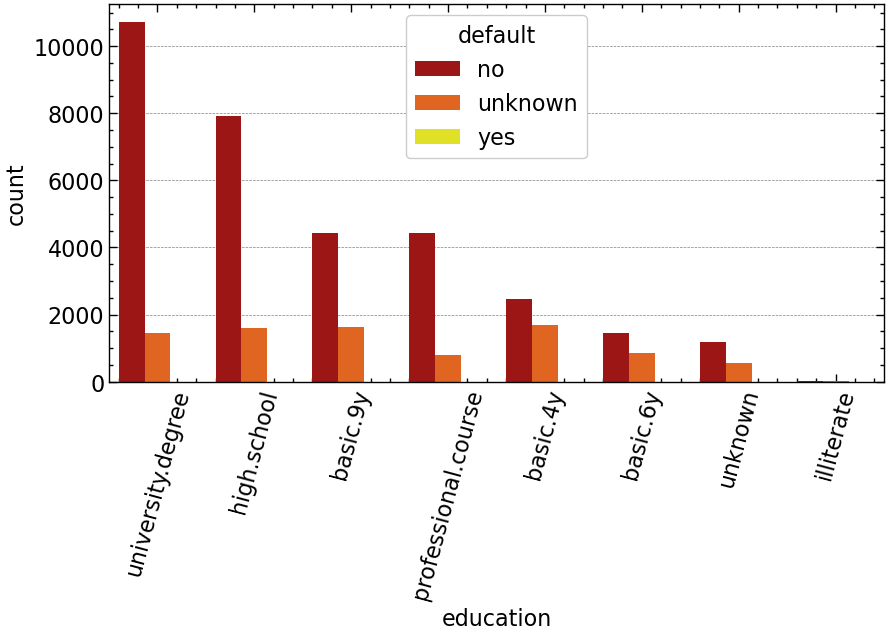

In [23]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='education', hue='default', data=df, order=df['education'].value_counts().index, palette='hot');
plt.xticks(rotation=75)
plt.show()

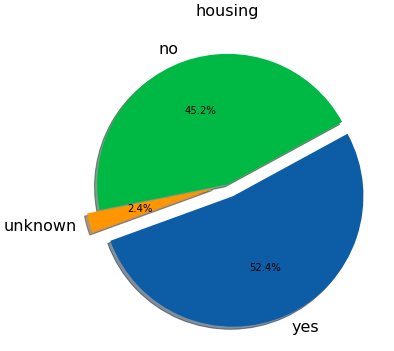

In [24]:
house_own = df['housing'].value_counts()
explode= (0.1, 0., 0.1)
plt.pie(house_own, labels=house_own.index, autopct='%1.1f%%', startangle=200, shadow=True, explode=explode);
plt.title('housing')
plt.show()

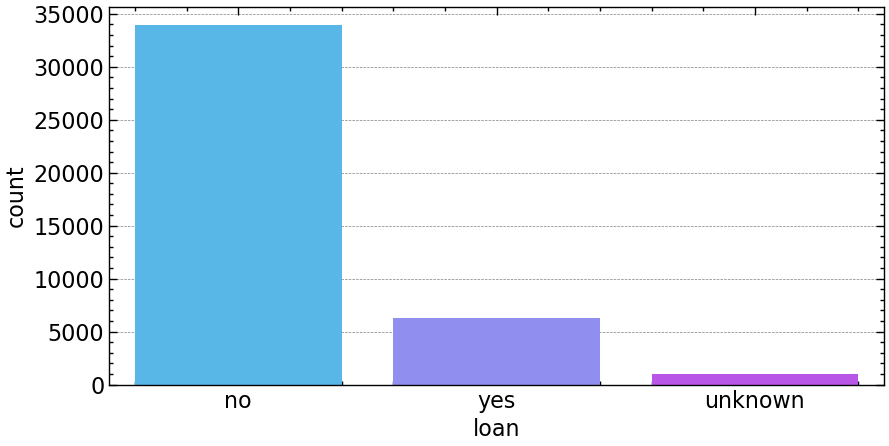

In [25]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='loan', data=df, palette='cool');

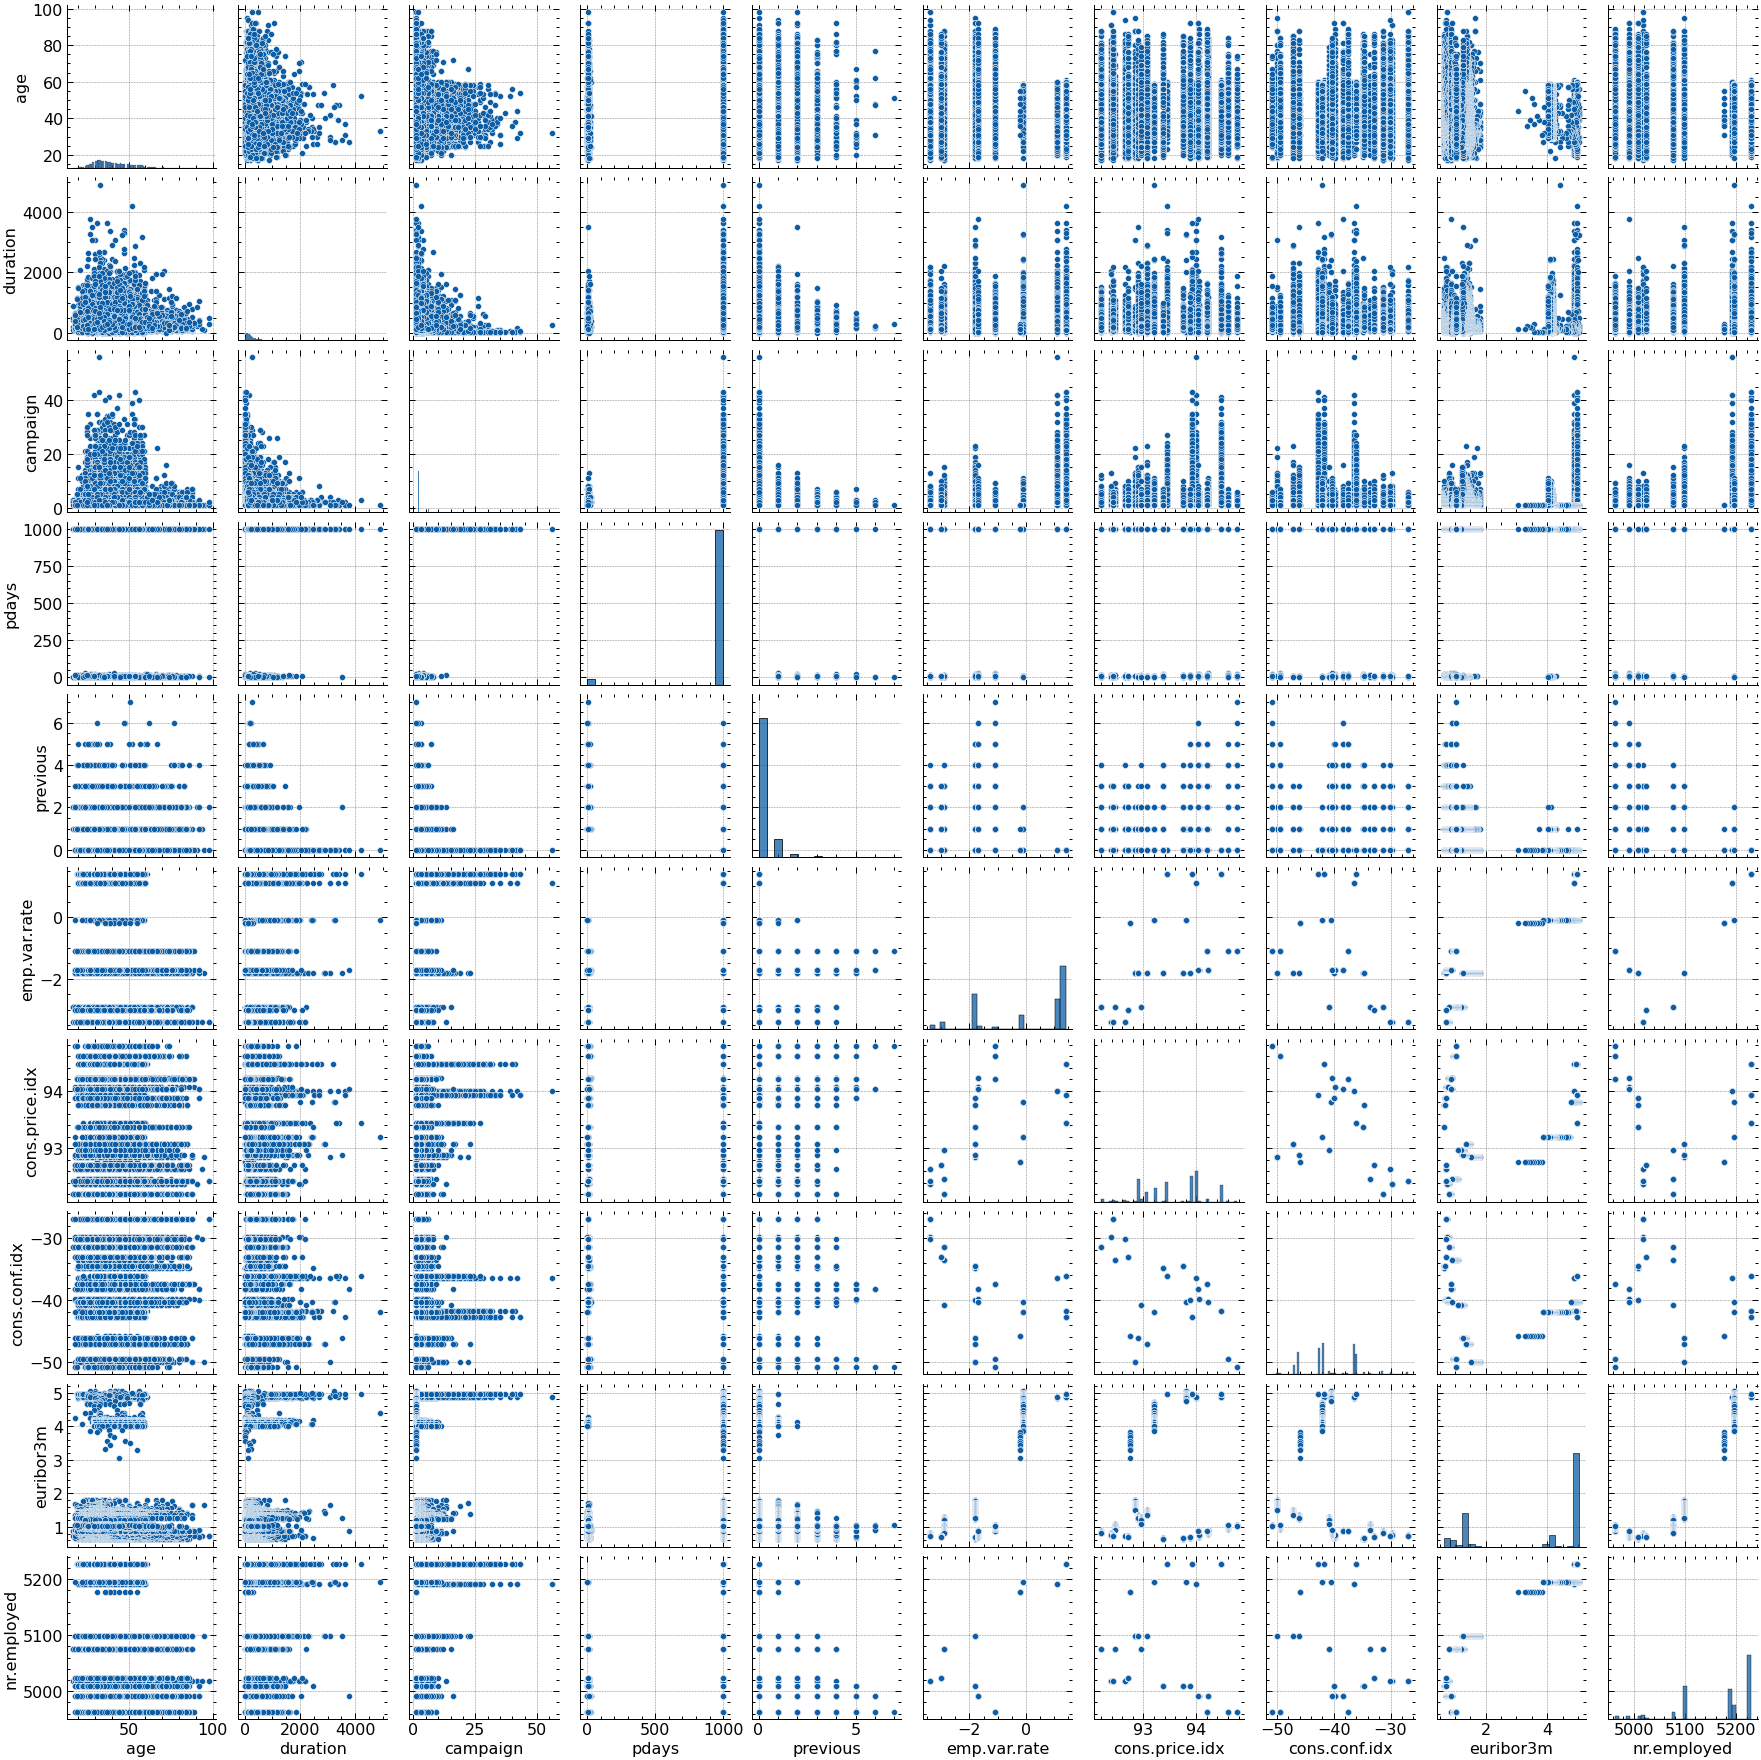

In [26]:
sns.pairplot(df);

 ## Feature engenering

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
df_dummies = pd.get_dummies(df)
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


### Scaling data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
df_scaler = scaler.fit_transform(df_dummies)

In [32]:
df_scaler

array([[ 1.53314313,  0.01035157, -0.56596326, ..., -0.18572799,
         0.35632455, -0.35632455],
       [ 1.62910732, -0.42157694, -0.56596326, ..., -0.18572799,
         0.35632455, -0.35632455],
       [-0.29017656, -0.12462609, -0.56596326, ..., -0.18572799,
         0.35632455, -0.35632455],
       ...,
       [ 1.53314313, -0.26731675, -0.20498953, ..., -0.18572799,
         0.35632455, -0.35632455],
       [ 0.3815728 ,  0.70837889, -0.56596326, ..., -0.18572799,
        -2.80643027,  2.80643027],
       [ 3.26049862, -0.07449153,  0.1559842 , ..., -0.18572799,
         0.35632455, -0.35632455]])

### Model KMeans

In [33]:
from sklearn.cluster import KMeans

In [34]:
model = KMeans(n_clusters= 4, max_iter=50)

In [35]:
cluster = model.fit(df_scaler)

In [36]:
cluster_label = cluster.labels_ 

In [37]:
cluster_label

array([3, 3, 3, ..., 2, 2, 2])

In [38]:
df_dummies['cluster']= cluster_label

In [39]:
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,3
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,3
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,3
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,3
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,3


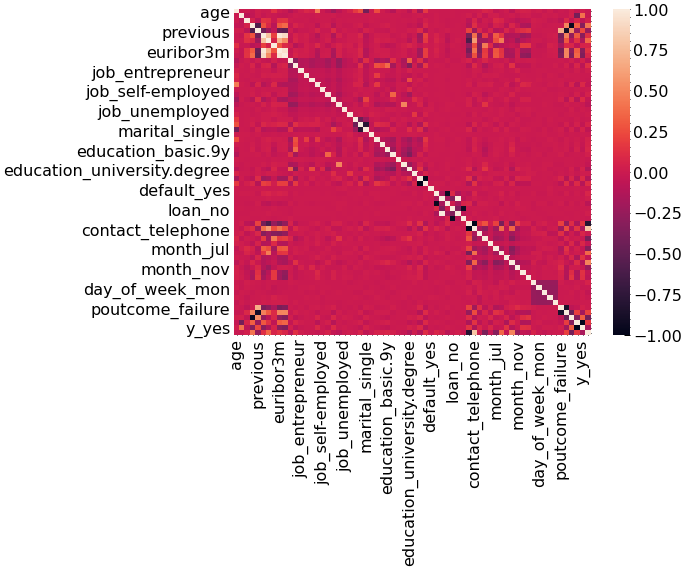

In [40]:
sns.heatmap(df_dummies.corr());

In [41]:
df_dummies.corr()['cluster']

age                    -0.009770
duration               -0.023101
campaign                0.036673
pdays                   0.419996
previous               -0.246174
                          ...   
poutcome_nonexistent    0.205931
poutcome_success       -0.400761
y_no                    0.160102
y_yes                  -0.160102
cluster                 1.000000
Name: cluster, Length: 66, dtype: float64

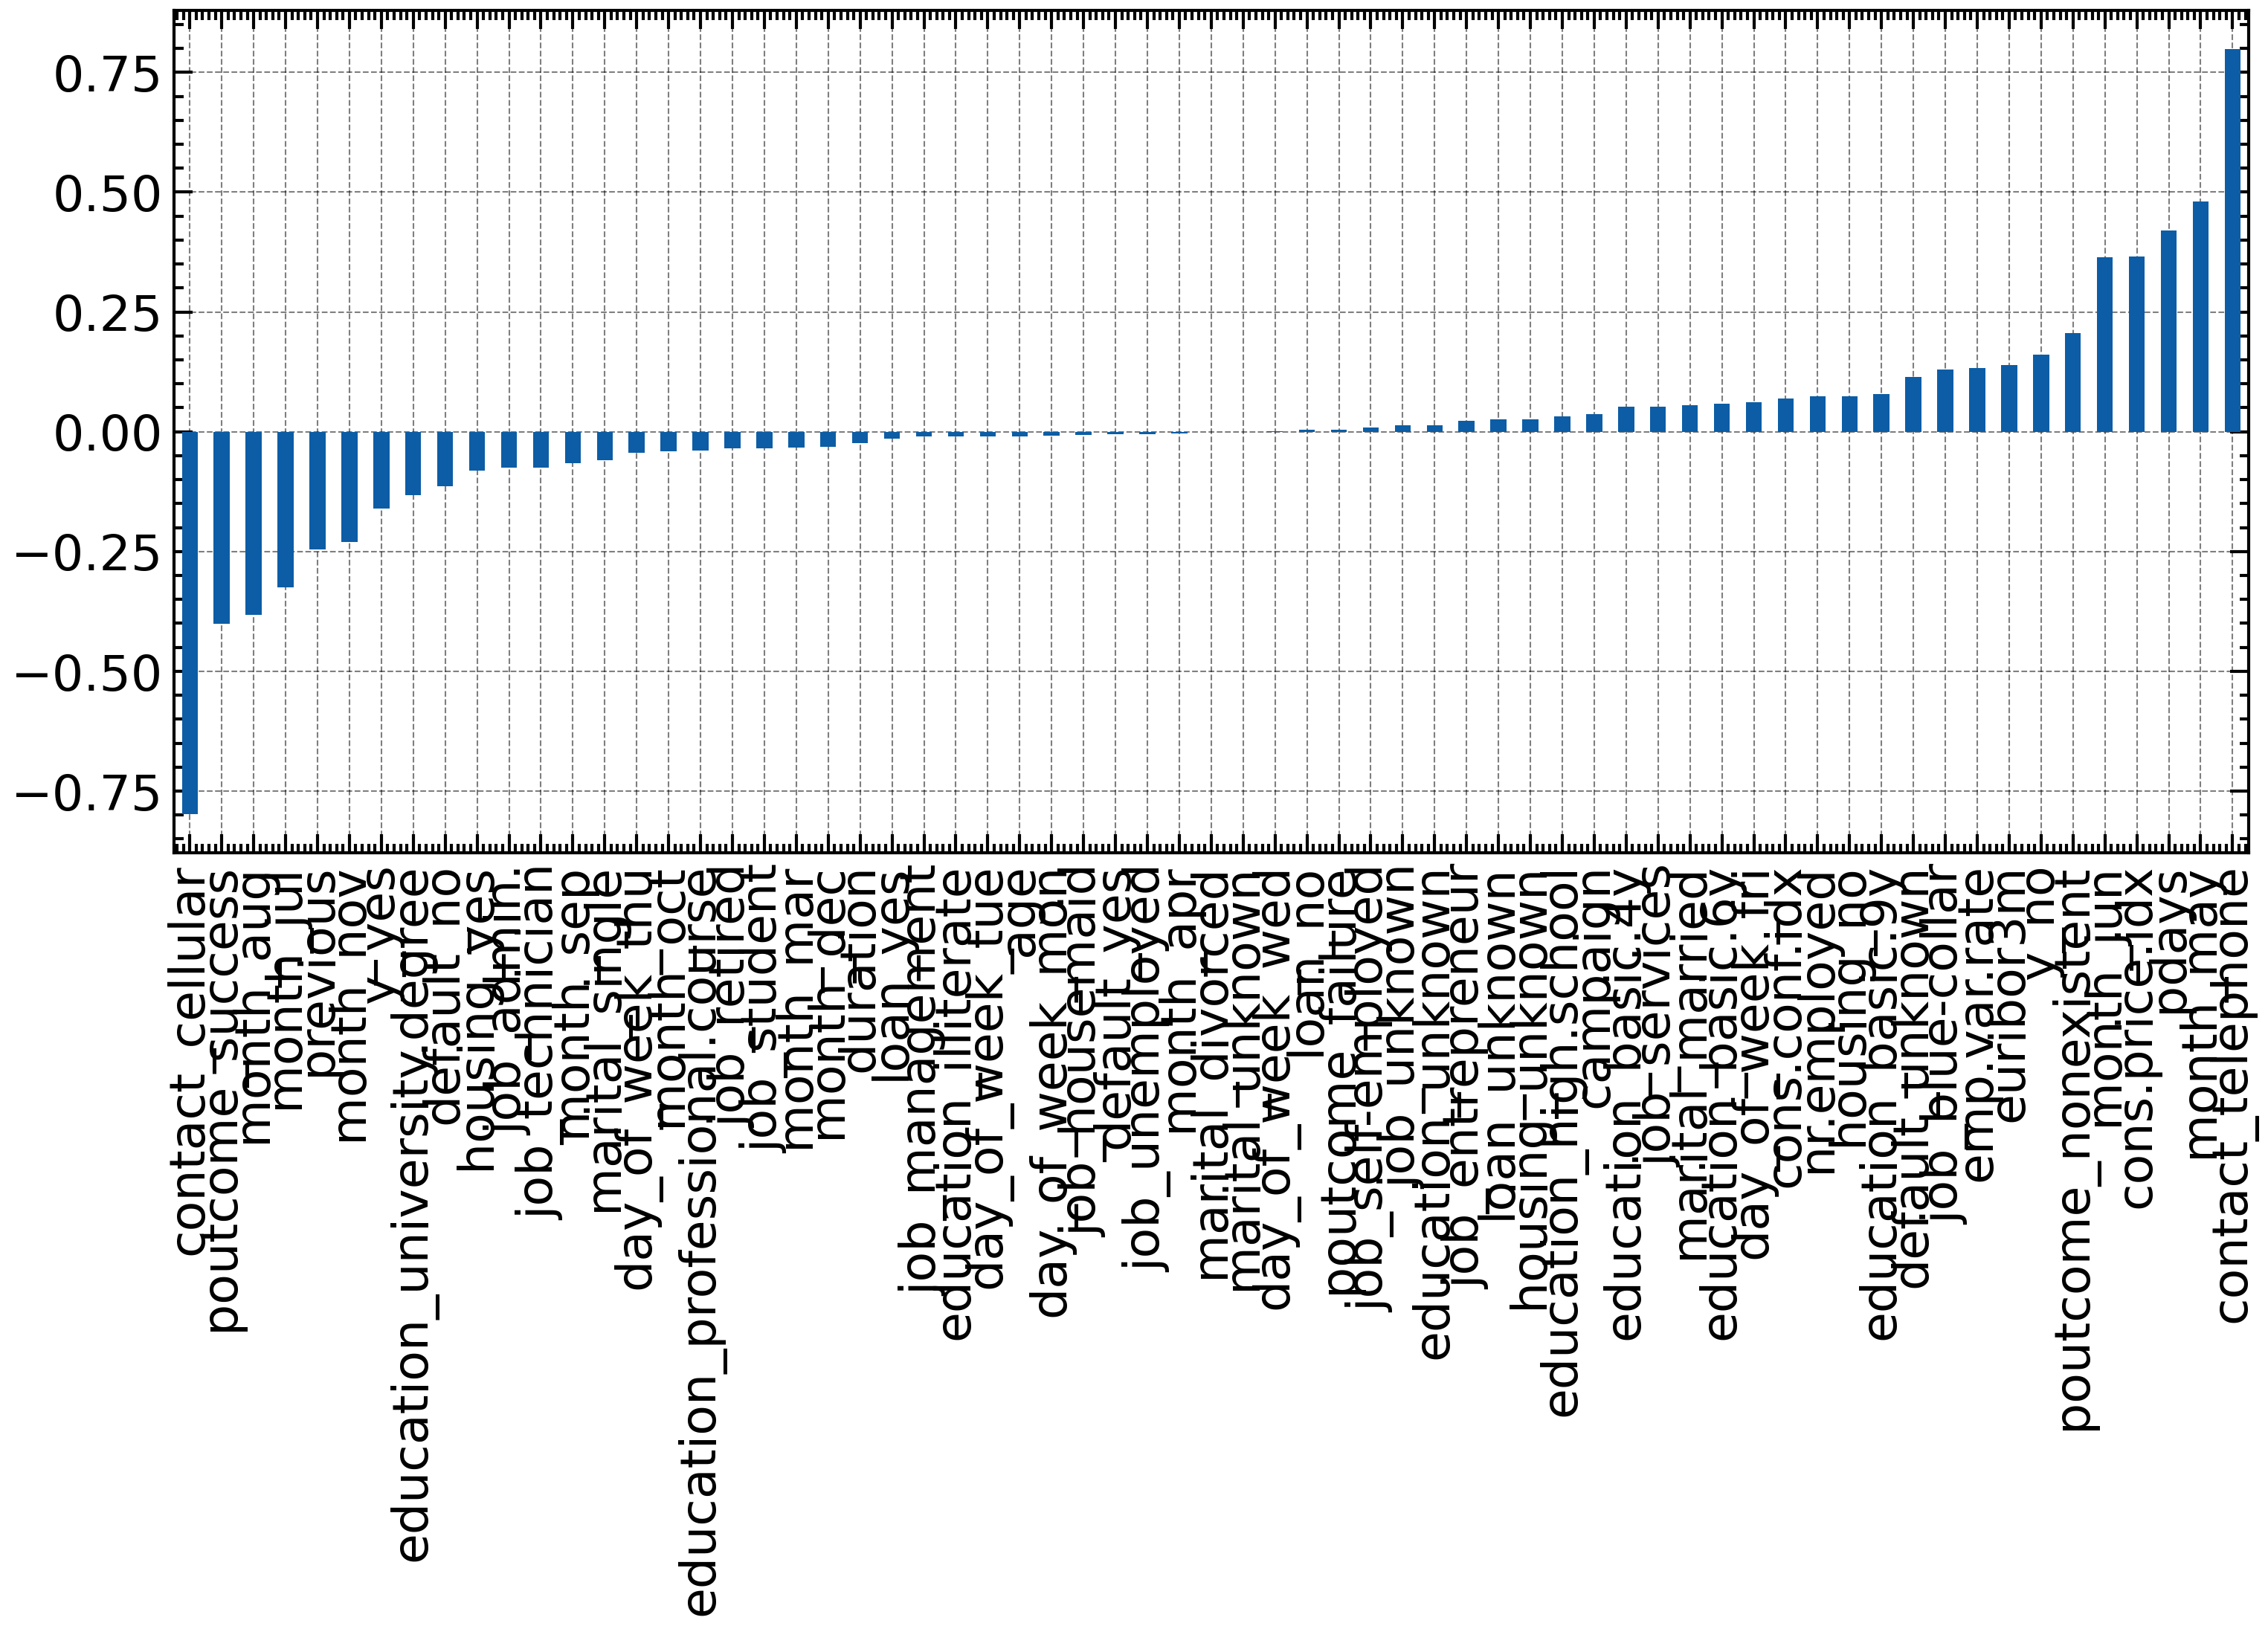

In [42]:
plt.figure(figsize=(12, 5), dpi=300)
df_dummies.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar');

### Method elbow
* Mencari jumlah optimal dari cluster (k) dengan menggunakan metode ***Elbow Curve***.

* ***Elbow Curve***, merupakan salah satu metode yang bisa digunakan untuk menemukan jumlah optimal dari cluster (k)

In [43]:
ssd = []
for k in range(2, 10):
    # model
    model = KMeans(n_clusters=k, max_iter= 50)
    model.fit(df_scaler)
    
    # ssd
    ssd.append(model.inertia_)

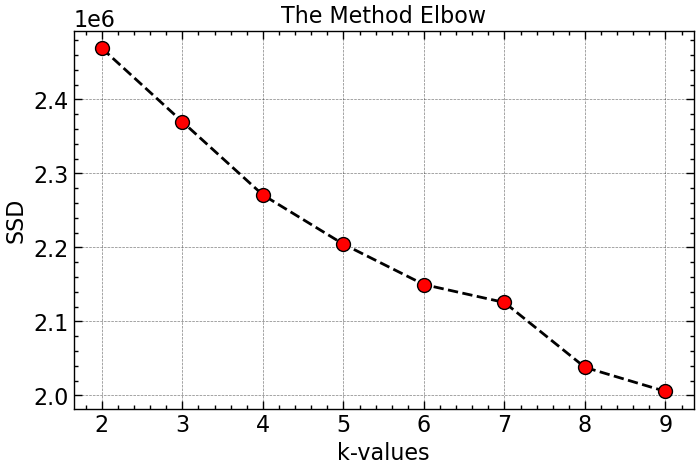

In [44]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(range(2,10), ssd, 'o--',color='black',markerfacecolor='red', markersize=10)
plt.title('The Method Elbow')
plt.xlabel('k-values')
plt.ylabel('SSD')
plt.show()

### Silhouette score
* Pada **elbow curve method**, lokasi ‘***tikungan***’ yang terbentuk di plot, pada umumnya dianggap sebagai indikator jumlah cluster yang tepat
* Akan tetapi nilai k ***optimal*** yang diperoleh dari metode elbow curve, sering kali bersifat ***ambigu*** atau belum pasti akan menghasilkan jumlah cluster (k) yang optimal

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
for k in range(2, 10):
    # model 
    model = KMeans(n_clusters=k, max_iter=50)
    cluster = model.fit(df_scaler)
    cluster_label = cluster.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaler, cluster_label)
    #silhoueter_avg = silhouette_score(df_scaler, cluster_label)
    print(f'n_cluster = {k} nilai silhouette score= {silhouette_avg}')

n_cluster = 2 nilai silhouette score= 0.11700751415727384
n_cluster = 3 nilai silhouette score= 0.04473244354257342
n_cluster = 4 nilai silhouette score= 0.05890096290652556
n_cluster = 5 nilai silhouette score= 0.06505912913698012
n_cluster = 6 nilai silhouette score= 0.07177519912572759
n_cluster = 7 nilai silhouette score= 0.06554029047864317
n_cluster = 8 nilai silhouette score= 0.0764394131744503
n_cluster = 9 nilai silhouette score= 0.08621094838676541


In [47]:
kmeans_for_k = [KMeans(n_clusters=k, max_iter=50).fit(df_scaler) for k in range(2, 10)]

silhouette_score = [silhouette_score(df_scaler, model.labels_)
                   for model in kmeans_for_k[:1] ]

In [48]:
silhouette_score 

[0.11700443576483463]

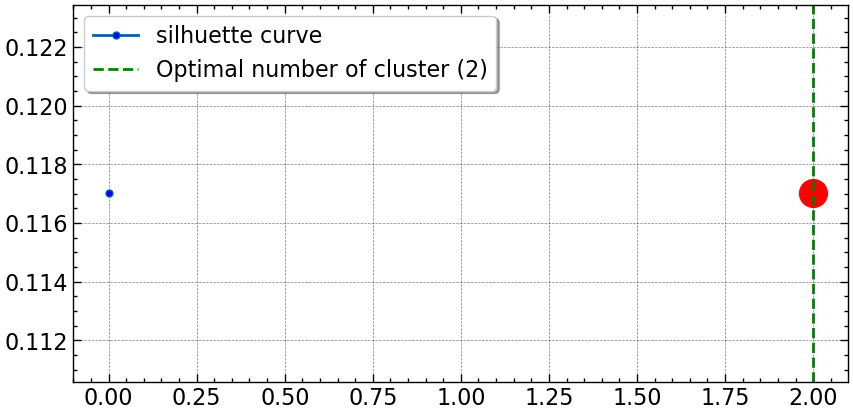

In [49]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(silhouette_score,'o-', markersize=5, markerfacecolor='blue', label='silhuette curve')

k = np.argmax(silhouette_score)+ 2

plt.axvline(k, ls='--', color='green', label='Optimal number of cluster ({})'.format(k))

plt.scatter(k, silhouette_score[k-2], color='red', s=400)
plt.legend(shadow=True)
plt.show()

* Hasil dari perhitungan **shilouette score** nilai tertinggi pada cluster (k-2)

## Final Model

In [50]:
k2 = KMeans(n_clusters=2, max_iter=50)

In [51]:
cls = k2.fit(df_scaler)

In [52]:
cluster_label = cls.labels_

In [53]:
cluster_label

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
df['cluster'] = cluster_label

In [55]:
df.corr()['cluster'].sort_values()

euribor3m        -0.959289
emp.var.rate     -0.932612
nr.employed      -0.886136
cons.price.idx   -0.679337
cons.conf.idx    -0.331096
pdays            -0.267738
campaign         -0.129168
age              -0.019760
duration          0.039854
previous          0.478541
cluster           1.000000
Name: cluster, dtype: float64

In [56]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [57]:
import plotly.express as px
import plotly.graph_objects as go

In [58]:
df = df.sort_values(by=['cluster'])

fig = px.scatter_3d(df,
                    x=df['age'], y=df['campaign'], z=df['cluster'],
                    opacity=1,
                    color= df['cluster'].astype(str),
                    color_discrete_sequence = ['black'] + px.colors.qualitative.Plotly,
                    hover_data = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                                'contact', 'month', 'day_of_week','campaign', 'pdays',
                                'poutcome', 'emp.var.rate', 'cons.price.idx',
                                'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
                    title='Hasil clusters k-2',
                    width = 500,
                    height = 500)

fig.update_layout(#title='cluster k-2',
                  showlegend=True,                  
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis= dict(backgroundcolor='white',
                                           color='black',
                                           gridcolor='#f0f0f0',
                                           title_font=dict(size=10),
                                           tickfont=dict(size=10),                                         
                                          ),
                              yaxis = dict(backgroundcolor='white',
                                           color='black',
                                           gridcolor='#f0f0f0',
                                           title_font=dict(size=10),
                                           tickfont=dict(size=10),
                                          ),
                              zaxis = dict(backgroundcolor='lightgrey',
                                          color='white',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),))
                 )

fig.update_traces(marker=dict(size=5))
fig.show()

In [59]:
fig.show(render='chrome')

In [60]:
import plotly.io as pio
pio.write_html(fig, file='index.html',auto_open =True)

* Hasil plotly mapping dapat di lihat di sini : https://yoppiibra.github.io/plotly_bank_k2/